<a href="https://colab.research.google.com/github/kiradust/cog_modelling_tutorials/blob/main/Numerical_Integration_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bridging programme: Numerical Integration

Developed by Hugo Soulat (minor modifications -- Kira Dusterwald)

## 1. Lagrange Polynomial Based Method For 1D Integration


Given a real function $f$ defined on $[a,b]$, we have seen that Lagrange interpolating polynomial can be used to approximate $I(a,b) = \int_a^b f(x)dx$. We recall that given a partition $a=p_0 \leq p_1 \leq \dots \leq p_K =b $ of $[a,b]$, the integral $I(a,b)$ can be approximated by

\begin{equation}
    I(a,b) = \int_a^b f(x)dx \approx \sum_{k=1}^{K} I_N(p_{k-1}, p_k)
\end{equation}

where $I_N(p_{k-1}, p_k) \approx I(p_{k-1}, p_k)$ uses a Lagrange Polynomial defined on $N$ points for evaluation of $f$:

- Rectangle Rule:
    $I_1(x,y) = (y-x) f \left( \frac{x+y}{2} \right)$
- Trapezoidal Rule:
    $I_2(x,y) = (y-x)  \left[ \frac{f(x)+f(y)}{2} \right]$
- Simpson's 1/3 Rule:
    $I_3(x,y) = \frac{(y-x)}{6}  \left[
    f(x) + 4 f\left( \frac{x+y}{2} \right) + f(y) \right]$
- Simpson's 3/8 Rule:
    $I_4(x,y) = \frac{(y-x)}{8}  \left[ f(x)  + 3 f\left( \frac{2x+y}{3} \right) + 3 f\left( \frac{x+2y}{3} \right) + f(y)\right]$




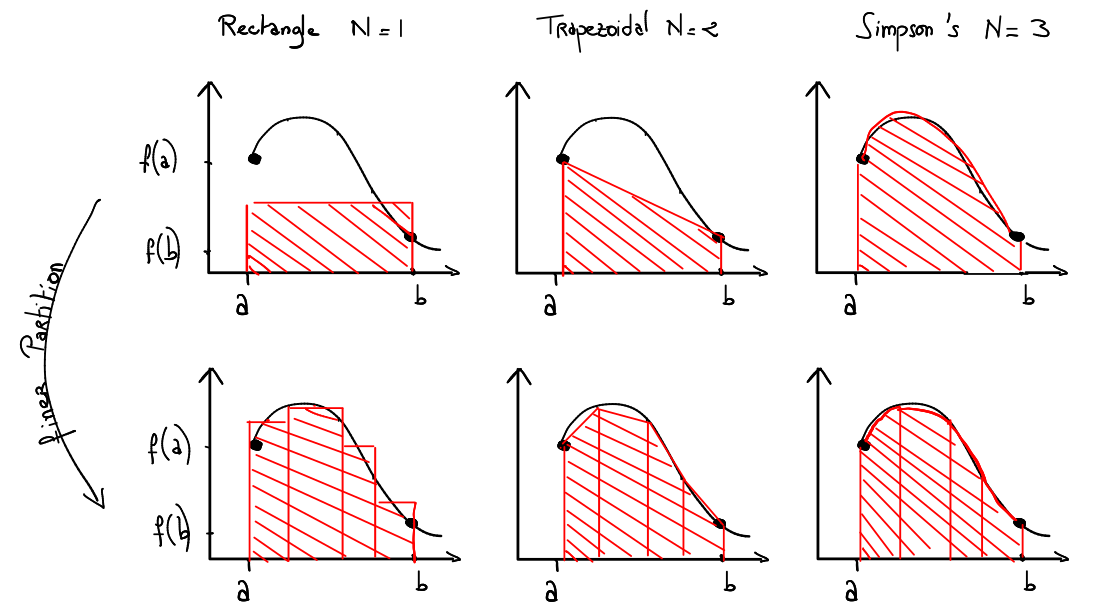


### Exercise 1.

a) Write a function `I_N`,  that takes real numbers`x`, `y` a function `f` and  `lagrange_order` (1,2,3 or 4) as argument and outputs Lagrange Polynomial approximations of the integral $I(x,y)$


In [ ]:
# Complete the following script

import numpy as np

def I_1(x,y, f):
    # Rectangle Rule
    return

def I_2(x,y, f):
    # Trapezoidal Rule
    return

def I_3(x,y, f):
    # Simpson's 1/3
    return

def I_4(x,y, f):
    # Simpson's 3/8
    return

def I_N(x,y, f, lagrange_order:int):
    # Lagrange Polynomial Based Approximation of The integral

    assert lagrange_order <= 4, 'Not Implemented'
    assert lagrange_order >= 1, 'Not Defined'

    if lagrange_order == 1:
        return I_1(x,y, f)

    elif lagrange_order == 2:
        return I_2(x,y, f)

    elif lagrange_order == 3:
        return I_3(x,y, f)

    elif lagrange_order == 4:
        return I_4(x,y, f)

    else:
        raise NotImplementedError

b) Write a function `lagrange_integral` that takes real number `a`, `b`, a function `f`,  integers  'lagrange_order' (1,2,3 or 4) and `partion_size` as arguments, and outputs Lagrange Polynomial approximations of the integral $I(a,b)$ that uses an evenly distributed partition of $[a,b]$.

In [ ]:
# Complete the following script

def lagrange_integral(a,b,f,lagrange_order:int, partion_size:int):
    # lagrange Polynomial Based Approximation of the Composite integral

    # Initialize the integral
    integral = 0

    # Step Size
    delta = ### FILL IN

    # Initialize Partition
    x = a

    # Loop over partition
    for step in range(partion_size):

        # Update Partition Upper bound
        y = x + ### FILL IN

        # Update Integral
        integral += ### FILL IN

        # Update Partition Lower bound
        x += ### FILL IN

    return integral

c) Test: let's test our algorithm on the following problem -- we'll design an intractable function and approximate it with a true integral that has very fine partitions/bins...

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def intractable_function(x):
    return 5 * ( 1.001 + np.cos(x))**0.2 + (x * np.log(100*x+1))**0.4

# Interval over which we integrate
a = 0
b = 10

# Use a fine partition as ground truth
def true_integral(a,b):
    return lagrange_integral(a,b,intractable_function, 1, 1000000)
true_value = true_integral(a,b)

# Set up the figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# plot
x = np.linspace(a, b, 200)
y = intractable_function(x)
ax1.plot(x, y, 'b')

# Label axis
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_title('An example function we wish to integrate', fontsize=14)

# Overlay a grid
ax1.grid(True)

plt.show()

Now let's compare your different methods for different `partition_sizes`.

In [ ]:
partition_sizes = [2, 4, 8, 16, 32, 100, 1000, 10000]

# Loop over order and partition size
error_all = np.zeros((4, len(partition_sizes)))
for size_id in range(len(partition_sizes)):
    for order_id in range(4):
        size_cur = partition_sizes[size_id]
        orde_cur = order_id + 1
        error_all[order_id, size_id] = np.abs(true_value - lagrange_integral(a,b,intractable_function, orde_cur, size_cur))


# Plot
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.loglog(partition_sizes, error_all[0],'o-', lw=2, label='Rectangle')
# need to run the other quadrature rules to allow the following 3 lines

ax1.loglog(partition_sizes, error_all[1], 'o-', lw=2, label='Trapezoidal')
ax1.loglog(partition_sizes, error_all[2], 'o-', lw=2, label='Simpson 1/3')
ax1.loglog(partition_sizes, error_all[3], 'o-', lw=2, label='Simpson 3/8')
ax1.set_xlabel('log(no. of partitions)', fontsize=14)
ax1.set_ylabel('log(error)', fontsize=14)
ax1.set_title('Quadrature rule convergence', fontsize=14)
ax1.legend(loc='best', fontsize=12)
ax1.grid(True)

plt.show()


## 2. Monte Carlo Sampling

### Exercise 2. Buffon's Needle

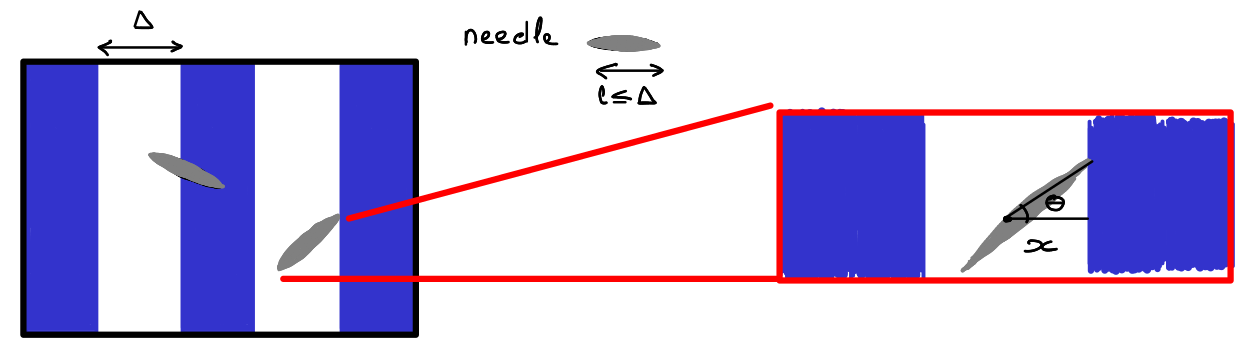


In class, we have seen that the probability $p$ that a needle of length $l$ lie across a line between two strips of width $\Delta$ is $p = \frac{1}{V} \int_\Omega f(x, \theta) dx d\theta = \frac{2l}{\Delta \pi}$. Write a Monte-Carlo based algorithm to estimate $\pi$.

Hint: Recall that $x \sim U[0, \Delta /2]$, $\theta \sim U[0, \pi /2]$ and that the condition for crossing a line is $x \leq \frac{\Delta}{2} \cos \theta$


In [ ]:
# Your solution
# Define needle length and strip width
l = 4
delta = 10

# Draws and average number of draws
draws = [100, 1000, 10000, 100000]
avg_num = 60

# Initialize errors
errors = []

# Loop over draw numbers
for N in draws:

    # Sample x
    x = ## FILL IN

    # sample theta
    theta = ## FILL IN

    # Does the needle crosses a stripe ?
    crosses = ## FILL IN

    # Probability of crossing a stripe
    P = ## FILL IN

    # Approximate Pi
    approx_pi = 2 * l / (P * delta + 1e-10)

    # Store Error
    error = np.mean(np.abs(approx_pi - np.pi))
    errors.append(error)

In [ ]:
# Plot result
plt.figure()
plt.loglog(draws, errors, lw=3, label='error')
plt.loglog(draws, 1/np.sqrt(draws), lw=3, label='1\sqrt(N)')
plt.xlabel('Num Samples')
plt.ylabel('Average error')
plt.legend()
plt.grid(True)

### Exercise 3. Estimate a volume

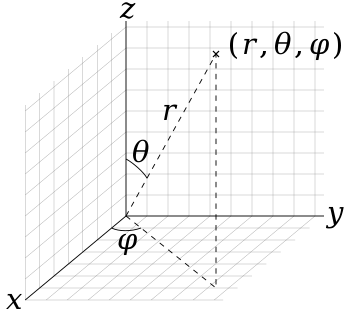

Given the notations on the graph above, use Monte-Carlo sampling to estimate the volume of the shape defined by:

$$r \leq 2 + \sin (7 \theta + 5 \phi) \quad \text{ for } \quad 0\leq \theta \leq 2 \pi \quad \text{ and } \quad 0 \leq \phi \leq \pi$$

This shape is plotted below.




In [6]:
#import plotly.plotly as py
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Theta and Phi
theta = np.linspace(0, 2 * np.pi, 240)
phi = np.linspace(0, np.pi, 240)
phiGrid, thetaGrid = np.meshgrid(theta, phi)

# Radius
r = 2 + np.sin(7 * thetaGrid + 5 * phiGrid)

# Cartesian Coordinates
x = r * np.cos(thetaGrid) * np.sin(phiGrid)
y = r * np.sin(thetaGrid) * np.sin(phiGrid)
z = r * np.cos(phiGrid)

# Build surface
surface = go.Surface(x=x, y=y, z=z)
data = [surface]

# Interactive plot
fig = make_subplots(rows=1, cols=1,
                    specs=[[{'is_3d': True}]],
                    subplot_titles=['Color corresponds to z'],
                    )
fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07), 1, 1)
fig.show()

In [ ]:
# Your solution

# Define a sphere to sample from
sphere_radius = ## FILL IN
sphere_volume = ## FILL IN

# Define an indicator function: is a point in the volume ?
def in_volume(r, theta, phi):
    return r <= ## FILL IN

# Sample r, theta and phi uniformly
samples_num = 1000
samples_p = np.random.rand(samples_num) * 1 * np.pi
samples_r = ## FILL IN
samples_t = ## FILL IN

# Is the point in the volume ?
prob_in_volume = in_volume(samples_r, samples_t, samples_p).sum() / samples_num

# Estimate the volume of the shape.
shape_volume = prob_in_volume * sphere_volume

print('The Volume of the sampling sphere is ' + str(np.round(sphere_volume, 3)) + ' a.u')
print('The Volume of the beautiful shape ' + str(np.round(shape_volume, 3)) + ' a.u')

### Exercise 4. Estimate the determinant

Given a semi positive definite matrix $\Delta$, and assuming that you can sample from the multivariate normal distribution $\mathcal{N}$(0, I), write a function that estimates $\det(I + \Delta)$ using samples.

Is this how the $\det$ function is implemented in python ?

In [ ]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

# Build Delta
dim = 2
L = 3 * np.random.rand(dim,dim)
delta = np.matmul(L, L.T)

# True value of det(I + Delta)
true_value = np.linalg.det(delta + np.eye(dim))

In [ ]:
# Your solution

# Number of samples and trials
num_samples_tot = [10, 100, 1000, 10000, 100000]
num_trials = 100

# Initialize estimates
est_value = np.zeros(len(num_samples_tot))

# Loop over sample number
for cur_sample_id in range(len(num_samples_tot)):
    num_samples = num_samples_tot[cur_sample_id]
    cur_estimates = []

    # Loop over trials
    for _ in range(num_trials):

        # Get N(0,I) distributed samples
        samples= ## FILL IN

        # Calculate x.T Delta x for all samples x
        xDIx = ## FILL IN

        # Calculate exp(-x.T Delta x)
        fx = ## FILL IN

        # Estimated integral
        I = fx.mean()

        # Estimated det(I + Delta)
        estimated_value = ## FILL IN

        # Store Value
        cur_estimates.append(estimated_value)

    # Average estimate
    est_value[cur_sample_id] = np.array(cur_estimates).mean()

# Error
errors = np.abs(est_value - true_value)

In [ ]:
# Plot result
plt.figure()
plt.loglog(num_samples_tot, errors, lw=3, label='error')
plt.xlabel('Num Samples')
plt.ylabel('Average error')
plt.legend()
plt.grid(True)

# 4. Importance Sampling

Consider the following Problem:

<ipython-input-5-8a0acd06df8d>:40: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-5-8a0acd06df8d>:41: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




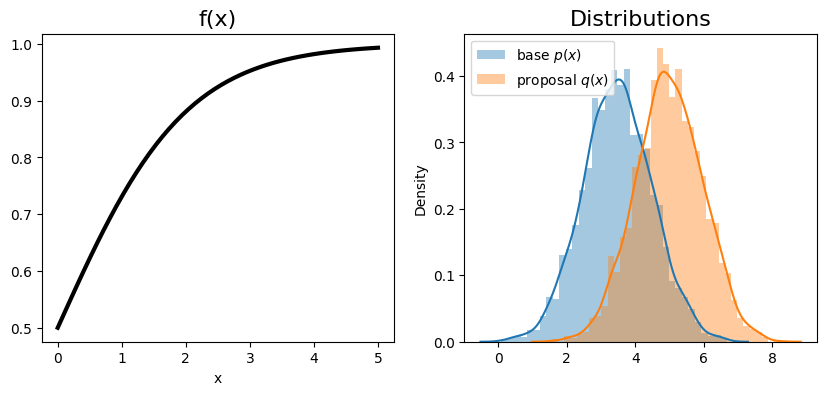

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def f(x):
    return 1/(1 + np.exp(-x))

# Use Normal Distributions
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

# pre-setting
num_samples = 1000

# Define base distribution p
loc = 3.5
var = 1
p_x = distribution(loc, var)


# Define proposal distribution q
loc_proposal = 5
var_proposal = 1
q_x = distribution(loc_proposal, var_proposal)



# Plot f
plt.figure(figsize=[10, 4])
plt.subplot(1, 2, 1)
x = np.linspace(0, 5)
plt.plot(x, f(x), color='k', lw=3)
plt.xlabel('x')
plt.title('f(x)', size=16)

plt.subplot(1, 2, 2)
sns.distplot([np.random.normal(loc, var) for _ in range(3000)], label="base $p(x)$")
sns.distplot([np.random.normal(loc_proposal, var_proposal) for _ in range(3000)], label="proposal $q(x)$")
plt.title("Distributions", size=16)
plt.legend()


Write a Monte-Carlo and an Importance Sampling Estimate of $\mathbb{E}_p(f)$

In [ ]:
# Your solution

# Sample x from p
samples = ## FILL IN

# Evaluate E_p(f)
Epf = ## FILL IN

# Sample x from q
samples_proposal = ## FILL IN

# Importance weights
importance_weights = ## FILL IN

# Evaluate E_p(f) with importance sampling
Eif = ## FILL IN

print('Sampling Estimate ' + str(np.round(Epf,3)))
print('Importance Sampling Estimate ' + str(np.round(Eif,3)))